# keras AutoEncoder

In [1]:
import numpy as np
np.random.seed(1337)  # for reproducibility

from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Input
import matplotlib.pyplot as plt

Using TensorFlow backend.


## load data

In [4]:
(x_train, _), (x_test, y_test) = mnist.load_data()

# 使用min-max归一化，将0-1归一化到-0.5到0.5
x_train = x_train.astype('float32') / 255. - 0.5       # minmax_normalized
x_test = x_test.astype('float32') / 255. - 0.5         # minmax_normalized

# x_train = x_train.astype('float32') / 255.
# x_test = x_test.astype('float32') / 255.

print(x_train.shape)
print(x_test.shape)

x_train = x_train.reshape((x_train.shape[0], -1))
x_test = x_test.reshape((x_test.shape[0], -1))

print()
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)

(60000, 784)
(10000, 784)


## in order to plot in a 2D figure

In [7]:
encoding_dim = 2

# this is our input placeholder
input_img = Input(shape=(784,))

## encoder layers

In [9]:
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(10, activation='relu')(encoded)
encoder_output = Dense(encoding_dim)(encoded)

## decoder layers

In [10]:
decoded = Dense(10, activation='relu')(encoder_output)
decoded = Dense(64, activation='relu')(decoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='tanh')(decoded)

## construct the autoencoder model

In [11]:
autoencoder = Model(input=input_img, output=decoded)

C:\Users\andyni\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  if __name__ == '__main__':


## construct the encoder model for plotting

In [12]:
encoder = Model(input=input_img, output=encoder_output)

C:\Users\andyni\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  if __name__ == '__main__':


## compile autoencoder

In [13]:
autoencoder.compile(optimizer='adam', loss='mse')

## training

In [14]:
autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=256,
                shuffle=True)

Epoch 1/20
60000/60000 [==============================] - 6s - loss: 0.0695     
Epoch 2/20
60000/60000 [==============================] - 3s - loss: 0.0564     
Epoch 3/20
60000/60000 [==============================] - 3s - loss: 0.0510     
Epoch 4/20
60000/60000 [==============================] - 3s - loss: 0.0484     
Epoch 5/20
60000/60000 [==============================] - 3s - loss: 0.0464     
Epoch 6/20
60000/60000 [==============================] - 3s - loss: 0.0449     
Epoch 7/20
60000/60000 [==============================] - 3s - loss: 0.0438     
Epoch 8/20
60000/60000 [==============================] - 3s - loss: 0.0430     
Epoch 9/20
60000/60000 [==============================] - 3s - loss: 0.0423     
Epoch 10/20
60000/60000 [==============================] - 3s - loss: 0.0418     
Epoch 11/20
60000/60000 [==============================] - 3s - loss: 0.0414     
Epoch 12/20
60000/60000 [==============================] - 3s - loss: 0.0410     
Epoch 13/20
60000/60000 [

## plotting

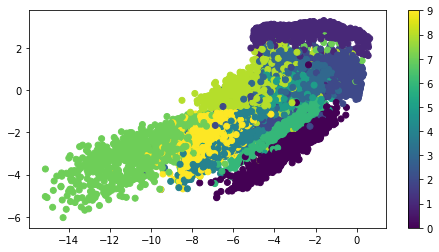

In [26]:
encoded_imgs = encoder.predict(x_test)
plt.figure(figsize=(8, 4))
plt.scatter(encoded_imgs[:, 0], encoded_imgs[:, 1], c=y_test)
plt.colorbar()
plt.show()